<h2 style="color:blue" align="center">Handwritten digits classification using KNN</h2>

In [1]:
#pip install tensorflow

In [2]:
from tensorflow import keras
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
(X_train,y_train), (X_test, y_test) = datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
len(X_test)

10000

In [7]:
type(X_train)

numpy.ndarray

In [8]:
X_train[0].shape

(28, 28)

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

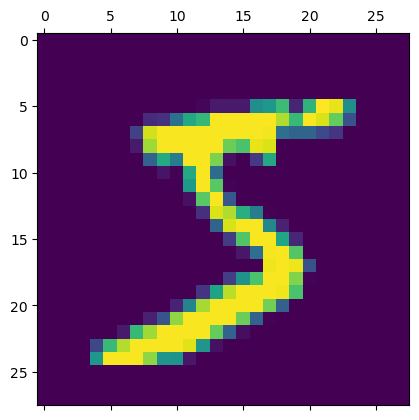

In [10]:
plt.matshow(X_train[0])

In [11]:
y_train[0]

5

Scalling

In [12]:
X_train = X_train / 255
X_test = X_test / 255

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

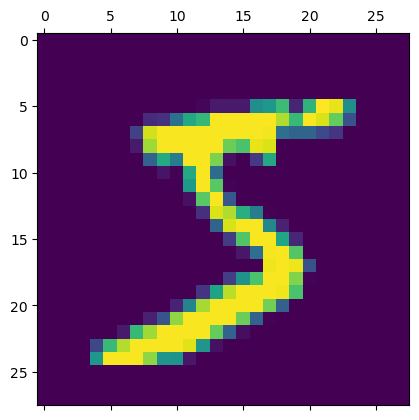

In [14]:
plt.matshow(X_train[0])

In [15]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)   #60000, 784
X_test_flattened = X_test.reshape(len(X_test), 28*28)

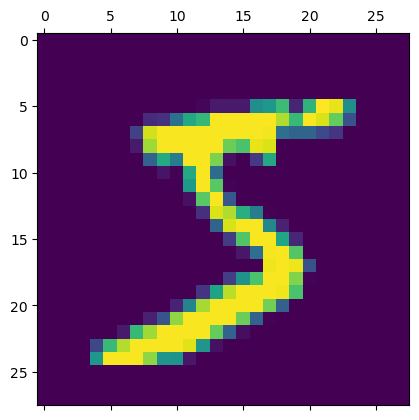

In [16]:
plt.matshow(X_train_flattened[0].reshape(28,28))

In [17]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Model Creating using KNeighborsClassifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_flattened, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
knn.score(X_test_flattened, y_test)

0.9705

In [20]:
knn.predict(X_test_flattened)

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# model create using PCA

In [21]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=50)

In [22]:
X_train_trf = pca.fit_transform(X_train_flattened)
X_test_trf = pca.transform(X_test_flattened)

In [23]:
#from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier()
knn2.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [68]:
knn2.score(X_test_trf, y_test)

0.9745

# Very simple neural network with no hidden layers

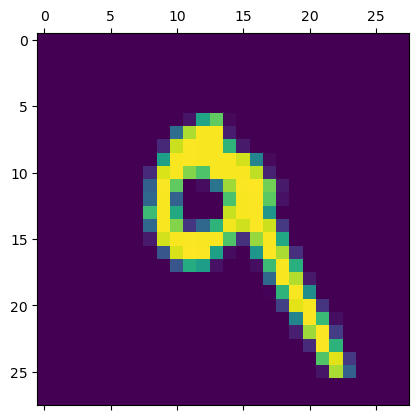

In [24]:
#y_test[6] #X_test[11]

plt.matshow(X_test[7])

In [25]:
X_test_flattened[7]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [26]:
import pandas as pd
df = pd.DataFrame(X_test_flattened[7])
df = df.T
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
knn.predict(df)

array([9], dtype=uint8)

### Roted

In [28]:
import cv2 

In [29]:
X_test[6]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [30]:
X_test[6].shape

(28, 28)

In [31]:
h, w = X_test[6].shape[:2]

center = (w / 2, h / 2)
mat = cv2.getRotationMatrix2D(center, 90, 1)
rotimg = cv2.warpAffine(X_test[6], mat, (h, w))

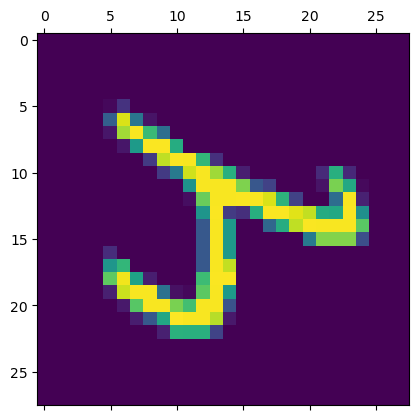

In [32]:
plt.matshow(rotimg)

In [33]:
rotimg.shape

(28, 28)

In [34]:
rotimg = rotimg.reshape(1, 28*28)

In [35]:
df = pd.DataFrame(rotimg)
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
knn.predict(df)

array([5], dtype=uint8)

### For Hard disk Image

In [37]:
modified_image = cv2.imread('modified.png', cv2.IMREAD_GRAYSCALE)
modified_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [38]:
modified_image.shape

(387, 386)

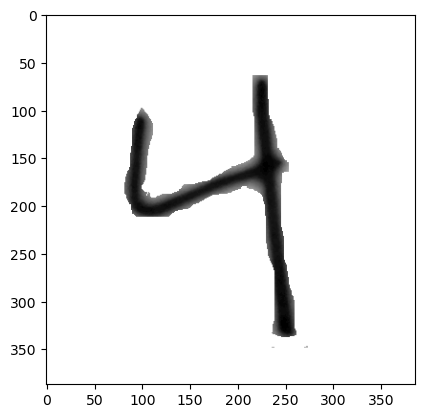

In [39]:
plt.imshow(modified_image, cmap='gray')

In [40]:
img_resizedM = cv2.bitwise_not(modified_image)
img_resizedM

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

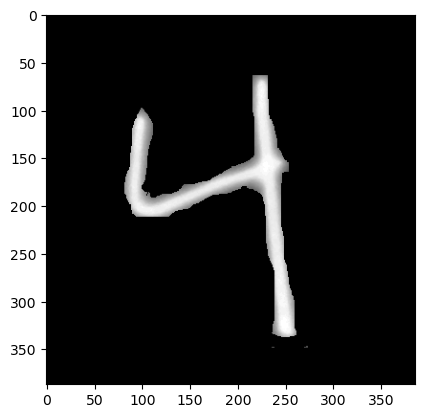

In [41]:
plt.imshow(img_resizedM, cmap='gray')

In [42]:

img_resizedM = cv2.resize(img_resizedM, (28,28), interpolation=cv2.INTER_LINEAR)
img_resizedM

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 214,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [43]:
img_resizedM.shape

(28, 28)

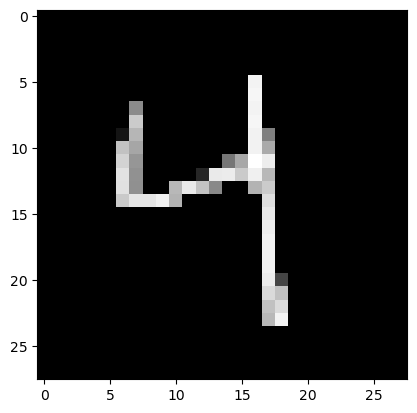

In [44]:
plt.imshow(img_resizedM, cmap='gray')

In [45]:
img_resizedM=img_resizedM/255
img_resizedM

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [46]:
img_resizedM_Flat = img_resizedM.reshape(1, 28*28) # convert 1D array
img_resizedM_Flat

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [47]:
df = pd.DataFrame(img_resizedM_Flat)
df = df
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
knn.predict(df)

array([4], dtype=uint8)

In [49]:
import joblib as jbl

jbl.dump(knn,'KNNModel_Job')

['KNNModel_Job']

In [50]:
df=pd.read_csv('Coded_Data.csv')

In [51]:
df

,Unnamed: 0,Cd_1,Cd_2,Cd_3,Cd_4,Cd_5,Cd_6,Cd_7,Cd_8,Cd_9,Cd_10,Result
0,1,53.1,63.4,33.0,46.2,47.3,21.2,44.3,36.1,46.6,65.0,Y
1,2,36.9,54.7,31.1,50.5,56.0,38.9,39.4,56.8,33.0,78.8,N
2,3,41.9,65.5,53.5,52.3,92.5,43.2,94.9,64.7,50.8,67.9,N
3,4,71.7,75.6,37.9,50.5,69.2,52.5,82.3,77.3,80.8,60.9,Y
4,5,74.3,51.8,36.4,40.9,74.7,42.2,65.1,36.2,77.6,74.9,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,58.7,56.4,49.5,38.1,62.8,35.2,43.6,17.9,59.3,71.2,Y
996,997,33.4,52.1,54.7,48.5,85.7,76.2,61.6,40.0,50.8,87.8,N
997,998,66.0,53.6,45.4,56.1,54.6,53.1,22.6,21.8,48.8,73.2,Y
998,999,63.0,47.0,23.6,40.7,97.5,56.6,50.0,59.4,67.7,62.7,Y


In [52]:
y =df['Result']
y.shape

(1000,)

In [53]:
x=df.drop(['Unnamed: 0', 'Result'],axis=1)

In [54]:
x.shape

(1000, 10)

In [55]:
x

,Cd_1,Cd_2,Cd_3,Cd_4,Cd_5,Cd_6,Cd_7,Cd_8,Cd_9,Cd_10
0,53.1,63.4,33.0,46.2,47.3,21.2,44.3,36.1,46.6,65.0
1,36.9,54.7,31.1,50.5,56.0,38.9,39.4,56.8,33.0,78.8
2,41.9,65.5,53.5,52.3,92.5,43.2,94.9,64.7,50.8,67.9
3,71.7,75.6,37.9,50.5,69.2,52.5,82.3,77.3,80.8,60.9
4,74.3,51.8,36.4,40.9,74.7,42.2,65.1,36.2,77.6,74.9
...,...,...,...,...,...,...,...,...,...,...
995,58.7,56.4,49.5,38.1,62.8,35.2,43.6,17.9,59.3,71.2
996,33.4,52.1,54.7,48.5,85.7,76.2,61.6,40.0,50.8,87.8
997,66.0,53.6,45.4,56.1,54.6,53.1,22.6,21.8,48.8,73.2
998,63.0,47.0,23.6,40.7,97.5,56.6,50.0,59.4,67.7,62.7


In [56]:
from sklearn.preprocessing import StandardScaler as ss  
scaler =ss()


In [57]:
scaled_features = scaler.fit_transform(x)

In [58]:
scaled_features

array([[-0.12252539,  0.1875694 , -0.91183199, ..., -1.48006982,
        -0.95256187, -0.64536551],
       [-1.08602779, -0.43340316, -1.02415132, ..., -0.20055606,
        -1.82621843,  0.6351032 ],
       [-0.78865051,  0.33745933,  0.30003449, ...,  0.28776079,
        -0.68275617, -0.3762815 ],
       ...,
       [ 0.64470801, -0.51191693, -0.17880055, ..., -2.36398512,
        -0.81123508,  0.11549271],
       [ 0.46628164, -0.98299956, -1.46751711, ..., -0.03984418,
         0.40289057, -0.85877696],
       [-0.39016495, -0.59756832, -1.43204784, ..., -0.56524838,
         0.33865112,  0.01342636]])

In [59]:
scaled_features.shape

(1000, 10)

In [60]:
df

,Unnamed: 0,Cd_1,Cd_2,Cd_3,Cd_4,Cd_5,Cd_6,Cd_7,Cd_8,Cd_9,Cd_10,Result
0,1,53.1,63.4,33.0,46.2,47.3,21.2,44.3,36.1,46.6,65.0,Y
1,2,36.9,54.7,31.1,50.5,56.0,38.9,39.4,56.8,33.0,78.8,N
2,3,41.9,65.5,53.5,52.3,92.5,43.2,94.9,64.7,50.8,67.9,N
3,4,71.7,75.6,37.9,50.5,69.2,52.5,82.3,77.3,80.8,60.9,Y
4,5,74.3,51.8,36.4,40.9,74.7,42.2,65.1,36.2,77.6,74.9,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,58.7,56.4,49.5,38.1,62.8,35.2,43.6,17.9,59.3,71.2,Y
996,997,33.4,52.1,54.7,48.5,85.7,76.2,61.6,40.0,50.8,87.8,N
997,998,66.0,53.6,45.4,56.1,54.6,53.1,22.6,21.8,48.8,73.2,Y
998,999,63.0,47.0,23.6,40.7,97.5,56.6,50.0,59.4,67.7,62.7,Y


In [61]:
cols = x.columns
cols

Index(['Cd_1', 'Cd_2', 'Cd_3', 'Cd_4', 'Cd_5', 'Cd_6', 'Cd_7', 'Cd_8', 'Cd_9',
       'Cd_10'],
      dtype='object')

In [62]:
df_scaled_features = pd.DataFrame(data=scaled_features, columns=cols) #df.columns[:-1])
df_scaled_features

,Cd_1,Cd_2,Cd_3,Cd_4,Cd_5,Cd_6,Cd_7,Cd_8,Cd_9,Cd_10
0,-0.122525,0.187569,-0.911832,0.318653,-1.035516,-2.305940,-0.801865,-1.480070,-0.952562,-0.645366
1,-1.086028,-0.433403,-1.024151,0.624941,-0.445471,-1.153296,-1.131088,-0.200556,-1.826218,0.635103
2,-0.788651,0.337459,0.300034,0.753154,2.030007,-0.873275,2.597862,0.287761,-0.682756,-0.376282
3,0.983718,1.058359,-0.622166,0.624941,0.449771,-0.267648,1.751290,1.066595,1.244427,-1.025795
4,1.138354,-0.640394,-0.710839,-0.058864,0.822788,-0.938396,0.595651,-1.473889,1.038861,0.273232
...,...,...,...,...,...,...,...,...,...,...
995,0.210537,-0.312064,0.063573,-0.258307,0.015714,-1.394244,-0.848897,-2.605053,-0.136721,-0.070082
996,-1.294192,-0.618981,0.370973,0.482481,1.568822,1.275723,0.360492,-1.239002,-0.682756,1.470191
997,0.644708,-0.511917,-0.178801,1.023827,-0.540420,-0.228575,-2.259851,-2.363985,-0.811235,0.115493
998,0.466282,-0.983000,-1.467517,-0.073110,2.369113,-0.000651,-0.418892,-0.039844,0.402891,-0.858777


In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_train = train_test_split(df_scaled_features,y, random_state=2, test_size=0.30)

In [64]:
X_train

,Cd_1,Cd_2,Cd_3,Cd_4,Cd_5,Cd_6,Cd_7,Cd_8,Cd_9,Cd_10
90,-0.241476,-1.375568,0.341415,-1.497703,-0.024979,-0.007163,0.481431,0.040512,1.064557,0.644382
305,-2.174429,-1.175715,1.559193,0.404129,-0.275917,0.364027,1.428786,1.276757,-0.914018,-2.890825
126,0.287855,-1.396981,-1.668510,2.113640,0.721056,0.800339,0.219397,1.227307,1.083829,-1.276321
963,0.609023,1.144010,-0.042835,-1.184293,-1.503483,0.142615,0.125333,-0.453986,0.820447,0.199002
163,0.561442,-1.025825,0.365061,0.795892,-0.648935,0.735218,-2.454698,-1.171009,-0.207384,1.284616
...,...,...,...,...,...,...,...,...,...,...
534,-1.121713,-0.411990,0.323681,0.582203,0.409078,-1.205393,-0.465924,1.091320,0.942502,0.932023
584,1.869902,-2.517587,0.524673,0.439743,-0.147057,0.898021,0.938311,-1.832400,-0.194536,0.031984
493,0.323541,0.358872,2.440013,1.266007,1.514565,0.057958,-0.546550,1.734168,-1.170976,-0.218543
527,-1.656992,-0.476229,0.713843,-0.365152,0.660017,2.154859,1.307847,0.881158,-0.258776,-0.459790


In [65]:
y_train

37     Y
726    N
846    N
295    Y
924    Y
      ..
894    N
540    N
567    N
641    N
129    N
Name: Result, Length: 300, dtype: object

In [66]:
X_test

,Cd_1,Cd_2,Cd_3,Cd_4,Cd_5,Cd_6,Cd_7,Cd_8,Cd_9,Cd_10
37,0.103481,1.279625,-0.131508,-0.728423,-1.164376,-0.508596,-0.136701,-1.288452,1.135220,-0.292773
726,-1.662940,0.508762,1.080358,-0.222692,0.727838,0.390076,-0.224046,1.010964,-1.871186,0.180444
846,-0.193896,1.115459,0.353238,1.857214,0.286999,1.653426,-1.339372,1.060414,-1.042497,1.154714
295,-0.158211,1.044083,0.453735,-1.583179,-0.445471,0.748242,-0.029200,0.936790,1.109525,-1.666029
924,0.597128,-2.139293,-0.840893,1.572295,-0.330174,-2.162674,-0.627176,0.089962,0.402891,-0.042246
...,...,...,...,...,...,...,...,...,...,...
894,-2.109006,-0.440541,1.169031,1.180532,-1.157594,-0.775593,1.233940,1.672355,-0.650636,-1.127861
540,-0.021417,0.201845,0.530585,-2.103155,-1.110119,-1.016541,0.105177,0.454654,-1.472901,-0.617529
567,-1.853261,-0.526192,-0.752220,0.639186,-1.544176,-0.645351,1.758009,0.071418,-0.303743,-0.023689
641,-1.258507,0.858505,-0.013277,-0.956358,0.354821,0.442173,-1.097494,1.004783,-0.258776,0.078378


In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [700, 300]